In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb

### 1.单位矩阵

In [2]:
a = np.eye(3)
a

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

### 2.单变量线性回归

#### 2.1读取数据

In [3]:
data = pd.read_csv('ex1data1.txt',header=None, names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
type(data)

pandas.core.frame.DataFrame

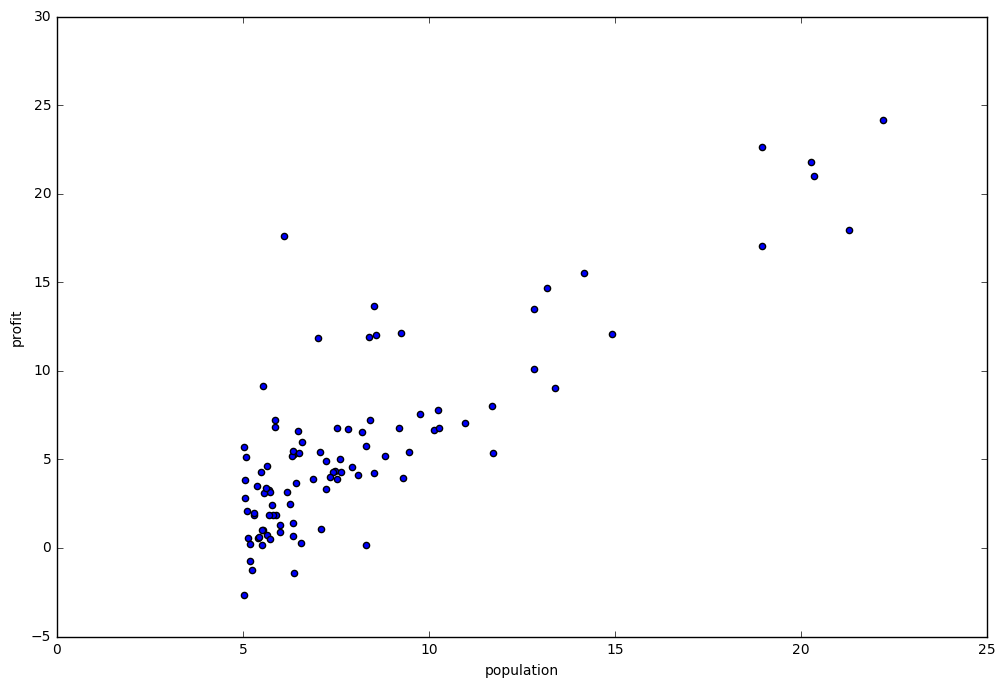

In [6]:
data.plot(kind='scatter', x='population', y='profit',figsize=(12,8))
plt.show()

In [7]:
data.insert(0,column='theat0',value=1)

In [8]:
data.head()

,theat0,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [9]:
X = data.iloc[:,:2]
y = data.iloc[:,2:3]
X = np.matrix(X.values)
y = np.matrix(y.values)

#### 2.2梯度下降求解

In [10]:
#参数θ有两个,假设初始值均为0
theta = np.matrix(np.array([0,0]))
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

- 以参数θ为特征函数的代价函数,根据最小二乘法
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

In [11]:
#代价函数
def computeCost(X, y, theta):
    inner = np.power(((X*theta.T) - y),2)
    return np.sum(inner)/(2*len(X))

In [12]:
computeCost(X, y, theta)

32.072733877455676

分析知:梯度下降算法是一个迭代算法,参数需要X,Y,以及学习率α,参数θ,迭代次数iters

参照公式$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [13]:
#梯度下降函数
def gradientDescent(X, y, theta, alpha, epoch):
    _theta = np.matrix(np.zeros(theta.shape))
    n_theta = int(theta.ravel().shape[1])
    data_cost = np.zeros(epoch)
    #时间复杂度0(iters)*0(theta_n)接近0(iters^2)
    for i in range(epoch):
        #偏导数中共同部分求和
        inner = (X*theta.T) - y
        for j in range(n_theta):
            #偏导数
            partialDerivative = np.sum(np.multiply(inner, X[:,j]))
            #根据公式求解theta0,theata1
            _theta[0,j] = theta[0,j] - (alpha/len(X) * partialDerivative)
        theta = _theta #同步更新的关键
        #把每次更新theta后的损失值存储起来,方便画图比较
        data_cost[i] = computeCost(X, y, theta)
    return theta, data_cost

In [14]:
#初始化变量,进行梯度下降
alpha = 0.01
epoch = 1000
theta, cost_data = gradientDescent(X, y, theta, alpha, epoch)

In [15]:
theta,cost_data[-3:]

(matrix([[-3.24140214,  1.1272942 ]]),
 array([ 4.51623786,  4.51609643,  4.5159555 ]))

#### 绘制数据的线性模型在原始数据上的分布,直观地看出它的拟合程度

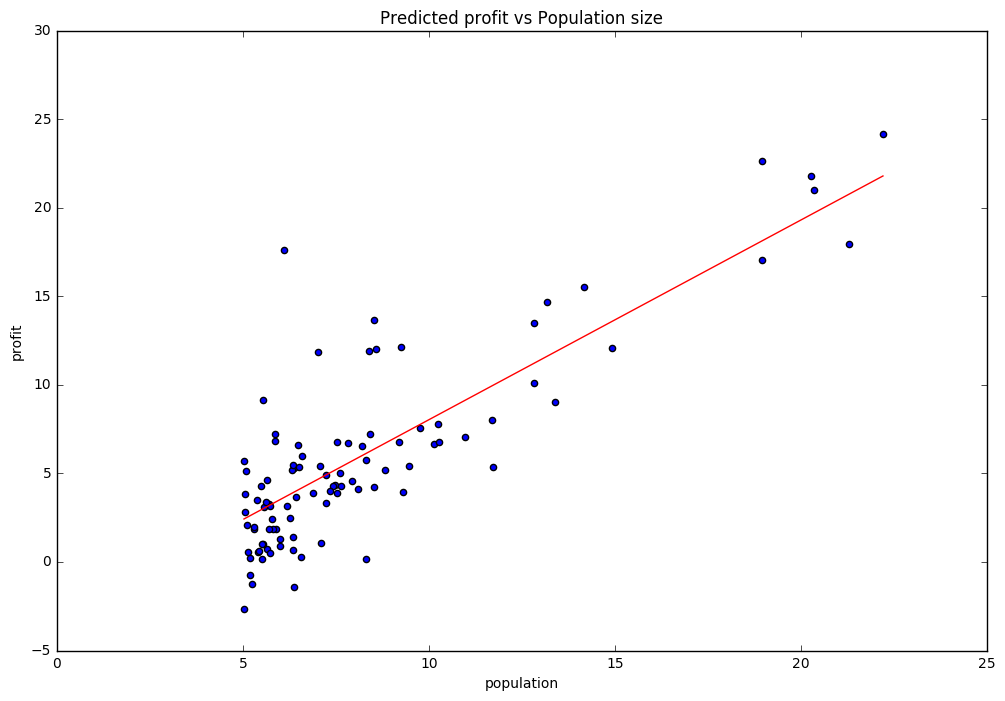

In [16]:
x = np.linspace(data.population.min(), data.population.max(),100)
h = theta[0,0] + (theta[0,1]*x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, h, 'r', label='population')#直线图
ax.scatter(data.population, data.profit, label='Training Data')#散点图
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('Predicted profit vs Population size')
plt.show()

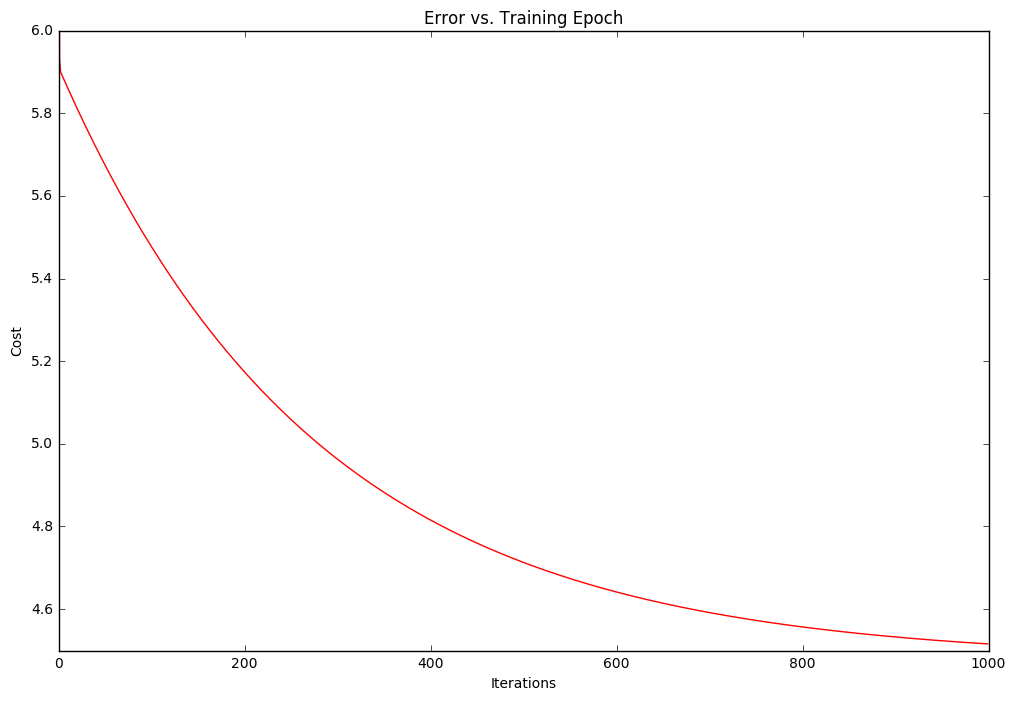

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch), cost_data, 'r')
ax.set_ylim([4.5,6.0])
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

#### 2.3正规方程求解最小值

In [18]:
var_tmp = (X.T*X)
theta = var_tmp.I*X.T*y

In [19]:
theta = theta.reshape(1,2)

In [20]:
computeCost(X, y, theta)

4.4769713759751788

### 3.多变量线性回归

In [21]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['size', 'bedroom', 'price'])
data2.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### 3.1 特征缩放进行数据的归一化)

In [22]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [23]:
# add ones column, and value=1
data2.insert(0, 'ones', 1)

#set X(training data) and Y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]

In [24]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [25]:
# convert to matrix and initialize  theta
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, epoch)

# get the cost of model
computeCost(X2, y2, g2)

0.13070336960771892

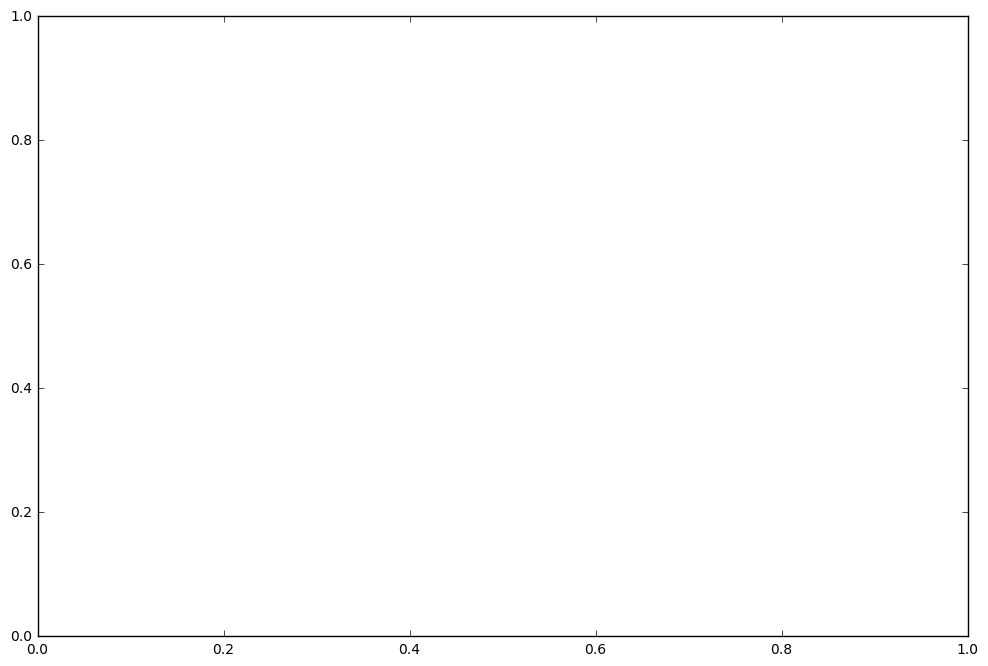

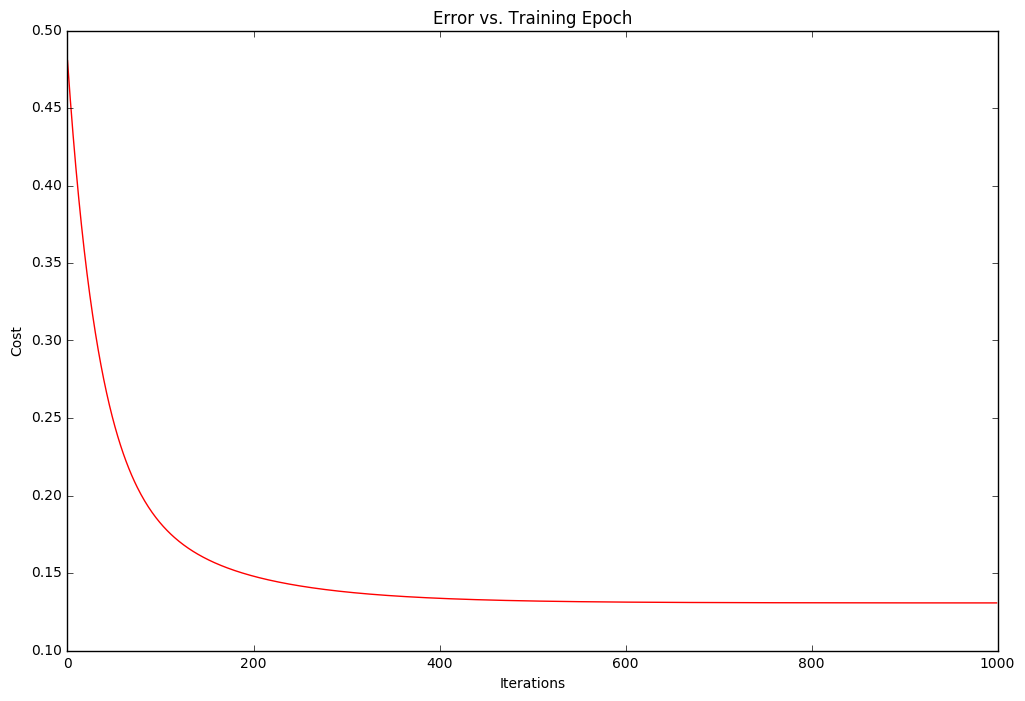

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### 原本自己写的代码
>参考别人代码之前,感觉自己写的还可以
>然后看了别人的,我对我自己写的呵呵o(*￣︶￣*)o

#### 3.1 特征归一化

In [26]:
data2 = pd.read_csv('ex1data2.txt', names=['size','bedroom','price'])
data2.head(),data.shape

(   size  bedroom   price
 0  2104        3  399900
 1  1600        3  329900
 2  2400        3  369000
 3  1416        2  232000
 4  3000        4  539900, (97, 3))

In [27]:
X_data2 = data2.iloc[:,:2]
X_data2.head(),X_data2.shape

(   size  bedroom
 0  2104        3
 1  1600        3
 2  2400        3
 3  1416        2
 4  3000        4, (47, 2))

In [28]:
range_size = X_data2['size'].max() - X_data2['size'].min()
range_bedroom = X_data2['bedroom'].max() - X_data2['bedroom'].min()
range_X_data2 = np.matrix(np.array([range_size, range_bedroom]))
range_X_data2.shape

(1, 2)

In [29]:
cnt = np.array(data.shape)[0]
tmp_sum = X_data2.sum()
sum_feature = tmp_sum.reshape((1,2))
rms = np.array(sum_feature/cnt)

In [30]:
X_data2.shape, rms.shape, range_X_data2.shape

((47, 2), (1, 2), (1, 2))

In [31]:
_X = []
for xi in X_data2.values:
    t = (xi-rms) / range_X_data2
    _X.append(t)
_X = np.matrix(np.array(_X))
_X.shape,type(_X)

((47, 2), numpy.matrixlib.defmatrix.matrix)

In [32]:
X = pd.DataFrame(_X, columns=['size', 'bedroom'])
X.insert(0,column='theta0', value=1)
X = np.matrix(X)
X.shape

(47, 3)

In [33]:
y = data2.iloc[:,2:3]
y = np.matrix(y)
y.shape

(47, 1)

In [34]:
tmp = X.T * X
theta_data2 = tmp.I * X.T * y
theta_data2.reshape((1,3))

matrix([[ 211126.7059499 ,  504777.90398791,  -34952.07644931]])